## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 8)

## Parte 1: Preparação e Manipulação dos Dados

In [2]:
# Carregar o dataset
url = 'https://raw.githubusercontent.com/Welington156/Diabets/refs/heads/main/diabetes.csv'
# Leia o CSV diretamente do GitHub
df = pd.read_csv(url)
print("Cabeçalho do Dataset:")
df.head()

Cabeçalho do Dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Filtragem: Selecionar pacientes diagnosticados sem diabetes (Outcome = 0)
diabetic_df = df[df['Outcome'] == 0]
print("\n== Exemplo: Pacientes com Diabetes ==")
diabetic_df.head()


== Exemplo: Pacientes com Diabetes ==


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


In [4]:
mean_by_idade = df.groupby('Age').mean()
print("\n== Média dos atributos por Idade ==")
mean_by_idade


== Média dos atributos por Idade ==


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
Age,,,,,,,,
21,1.079365,108.317460,65.936508,19.349206,73.634921,27.817460,0.433825,0.079365
22,1.555556,108.208333,63.722222,20.486111,74.486111,29.509722,0.430625,0.152778
23,1.578947,111.578947,64.315789,22.368421,118.026316,31.502632,0.438579,0.184211
24,1.891304,117.891304,64.956522,25.934783,88.021739,32.569565,0.393565,0.173913
25,1.770833,110.083333,59.666667,23.958333,82.895833,31.943750,0.600500,0.291667
26,1.969697,118.212121,64.181818,23.666667,90.878788,34.915152,0.413455,0.242424
27,2.562500,115.281250,73.500000,18.375000,63.125000,31.950000,0.471750,0.250000
28,3.028571,119.914286,68.314286,23.628571,94.600000,33.642857,0.459629,0.285714
29,3.310345,127.379310,68.241379,21.000000,88.793103,33.541379,0.408897,0.448276


## Parte 2: Visualização dos Dados

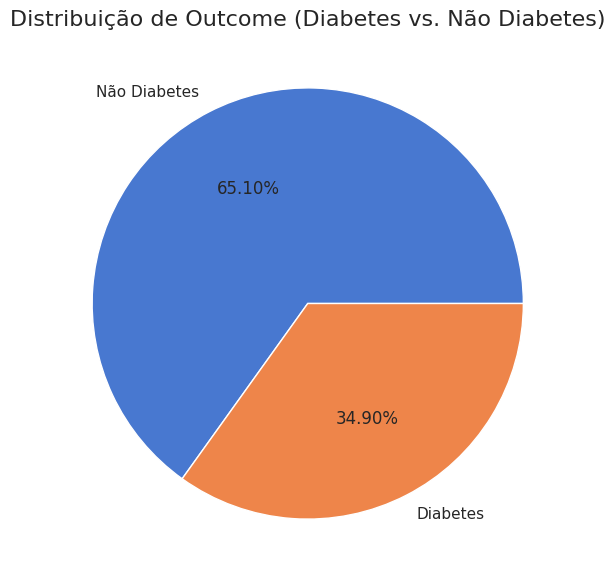

In [5]:
outcome_counts = df['Outcome'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(outcome_counts, labels=["Não Diabetes", "Diabetes"],autopct='%1.2f%%')
plt.title("Distribuição de Outcome (Diabetes vs. Não Diabetes)", fontsize=16)
plt.show()

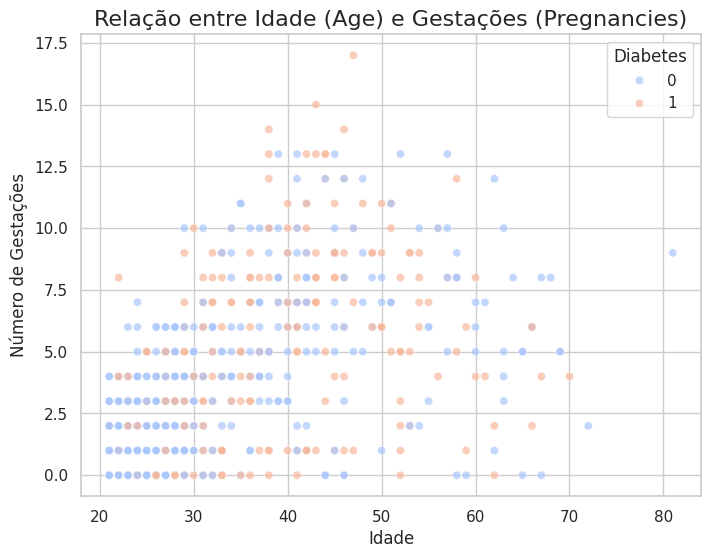

In [6]:
# Gráfico de Dispersão entre Age e Pregnancies
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Pregnancies', data=df, hue='Outcome', palette='coolwarm', alpha=0.7)
plt.title("Relação entre Idade (Age) e Gestações (Pregnancies)", fontsize=16)
plt.xlabel("Idade", fontsize=12)
plt.ylabel("Número de Gestações", fontsize=12)
plt.legend(title="Diabetes")
plt.show()


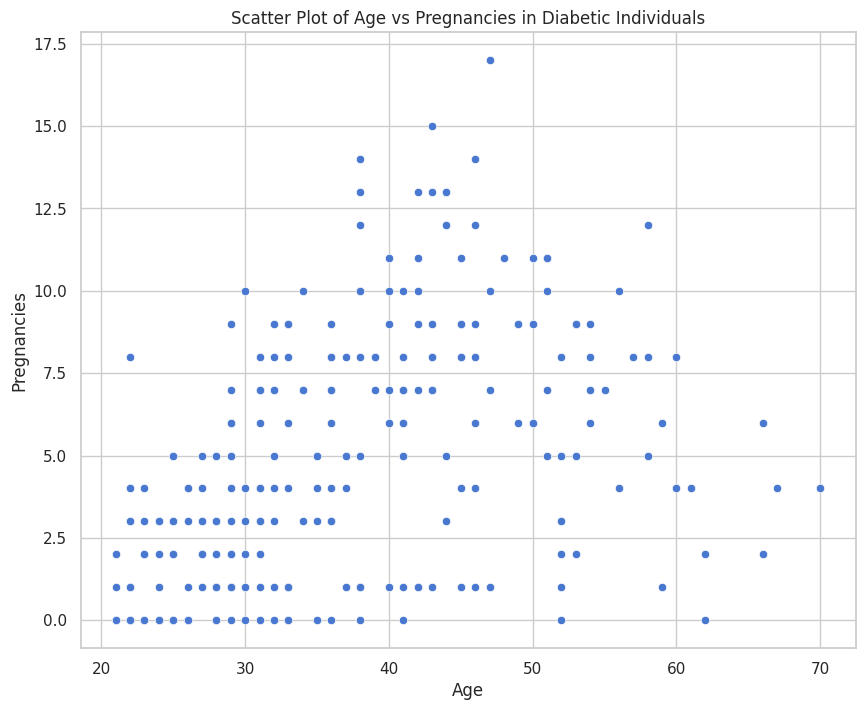

In [7]:
sns.scatterplot(x='Age', y='Pregnancies', data=df[df['Outcome'] == 1])
plt.title('Scatter Plot of Age vs Pregnancies in Diabetic Individuals')
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.show()

## Parte 3: Predição de Classes com KNN

Acurácia do modelo: 0.7013


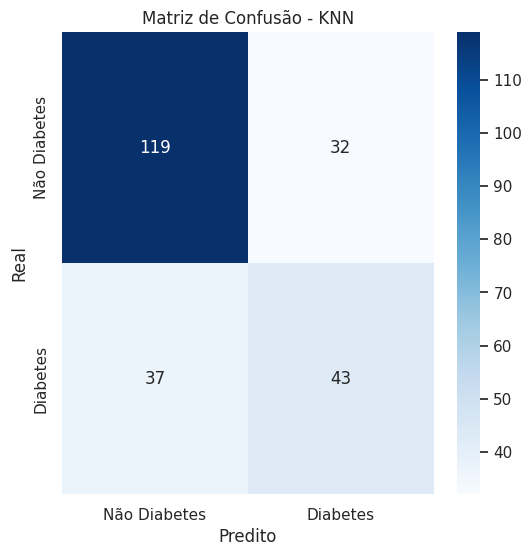

Matriz de Confusão:
[[119  32]
 [ 37  43]]


In [8]:
# Dividindo em variáveis independentes (X) e dependente (y)
X = df.drop(columns=["Outcome"])  # Variáveis independentes
y = df["Outcome"]  # Variável dependente

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizando os dados (necessário para o KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinando o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Usando K=5 como exemplo
knn.fit(X_train_scaled, y_train)

# Fazendo previsões
y_pred = knn.predict(X_test_scaled)

# Avaliando o modelo: Acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.4f}")

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Não Diabetes", "Diabetes"], yticklabels=["Não Diabetes", "Diabetes"])
plt.title("Matriz de Confusão - KNN")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

# Exibindo a acurácia e matriz de confusão
print("Matriz de Confusão:")
print(cm)


Acurácia do modelo: 0.7100


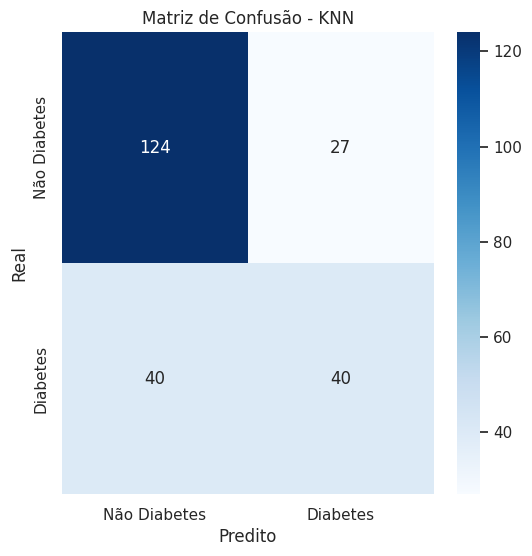

Matriz de Confusão:
[[124  27]
 [ 40  40]]


In [9]:
# Dividindo em variáveis independentes (X) e dependente (y)
X = df.drop(columns=["Outcome"])  # Variáveis independentes
y = df["Outcome"]  # Variável dependente

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizando os dados (necessário para o KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinando o modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)  # Usando K=5 como exemplo
knn.fit(X_train_scaled, y_train)

# Fazendo previsões
y_pred = knn.predict(X_test_scaled)

# Avaliando o modelo: Acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.4f}")

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Não Diabetes", "Diabetes"], yticklabels=["Não Diabetes", "Diabetes"])
plt.title("Matriz de Confusão - KNN")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

# Exibindo a acurácia e matriz de confusão
print("Matriz de Confusão:")
print(cm)


Acurácia do modelo: 0.6970


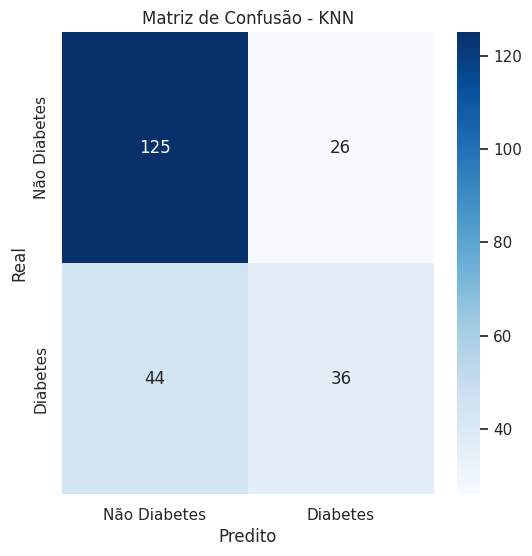

Matriz de Confusão:
[[125  26]
 [ 44  36]]


In [10]:
# Dividindo em variáveis independentes (X) e dependente (y)
X = df.drop(columns=["Outcome"])  # Variáveis independentes
y = df["Outcome"]  # Variável dependente

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizando os dados (necessário para o KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinando o modelo KNN
knn = KNeighborsClassifier(n_neighbors=10)  # Usando K=5 como exemplo
knn.fit(X_train_scaled, y_train)

# Fazendo previsões
y_pred = knn.predict(X_test_scaled)

# Avaliando o modelo: Acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.4f}")

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Não Diabetes", "Diabetes"], yticklabels=["Não Diabetes", "Diabetes"])
plt.title("Matriz de Confusão - KNN")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

# Exibindo a acurácia e matriz de confusão
print("Matriz de Confusão:")
print(cm)
